## Q1 Concepts
1.1 AD

1.2 B

## Q2 Convex
a) convex

b) non-convex

c) convex

d) non-convex

e) non-convex

f) non-convex

## Q3 Argmin and Argmax 

Since argmin G(w) = 5 and argmax G(w) = 76, and argmaxG(w) = argmin-ln(G(w))

w* = argmin 10 - 4*argmin*lnG(w)

   = argmin 10 - 4*argmin G(w)
   
   = argmin 10 - 4*5
   
   = argmin 10 - 20

## Q4 Derive by hand

L(w)' = 2*(y-wx+0.5)*x = 2x(y-wx+0.5)

## Q5 Regression

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'

In [127]:
num = 30
# X1_range = np.linspace(0,10,num)
# X2_range = np.linspace(0,10,num)
# X1, X2 = np.meshgrid(X1_range, X2_range)
# Y = X1 + 2*X2 - 1
# X1 = X1 + np.random.randn(num, num) / 2
# X2 = X2 + np.random.randn(num, num) / 2
# Y = Y + np.random.randn(num, num) / 2

# fig = plt.figure(figsize = (6, 6))
# ax = Axes3D(fig, elev = -150, azim = 130)
# ax.scatter(X1, X2, Y)
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Y')
# plt.show()
# X_and_Y = np.hstack((X1.reshape(-1,1), X2.reshape(-1,1), Y.reshape(-1,1)))
# np.save('q4-gradient-descent.npy', X_and_Y)

In [128]:
X_and_Y = np.load('./gradient-descent.npy')
X1 = X_and_Y[:, 0]    # Shape: (900,)
X2 = X_and_Y[:, 1]    # Shape: (900,)
Y  = X_and_Y[:, 2]    # Shape: (900,)
print(X1.shape, X2.shape, Y.shape)

(900,) (900,) (900,)


### Original Data

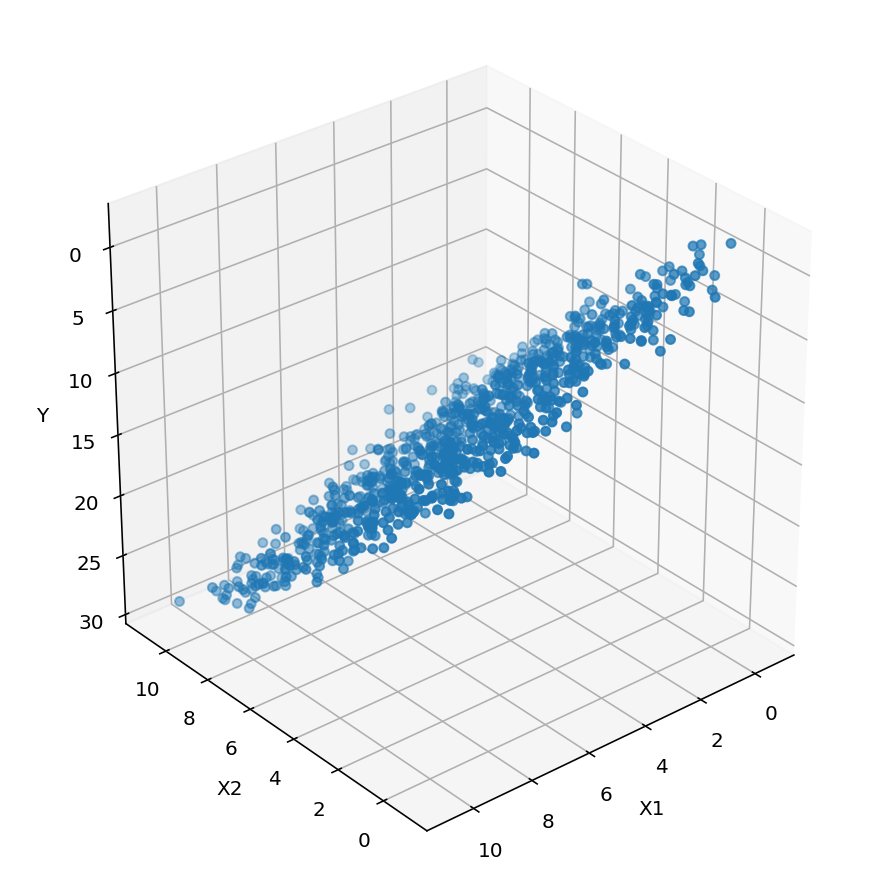

In [129]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Linear Regression Using the Closed Form

In [130]:
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
X = np.matrix(np.hstack((np.ones((len(X1),1)),
                          X1.reshape(-1,1),
                          X2.reshape(-1,1))))
W = X.T.dot(X).I.dot(X.T).dot(Y)

w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

Y = -0.70 + 0.98*X1 + 1.94*X2


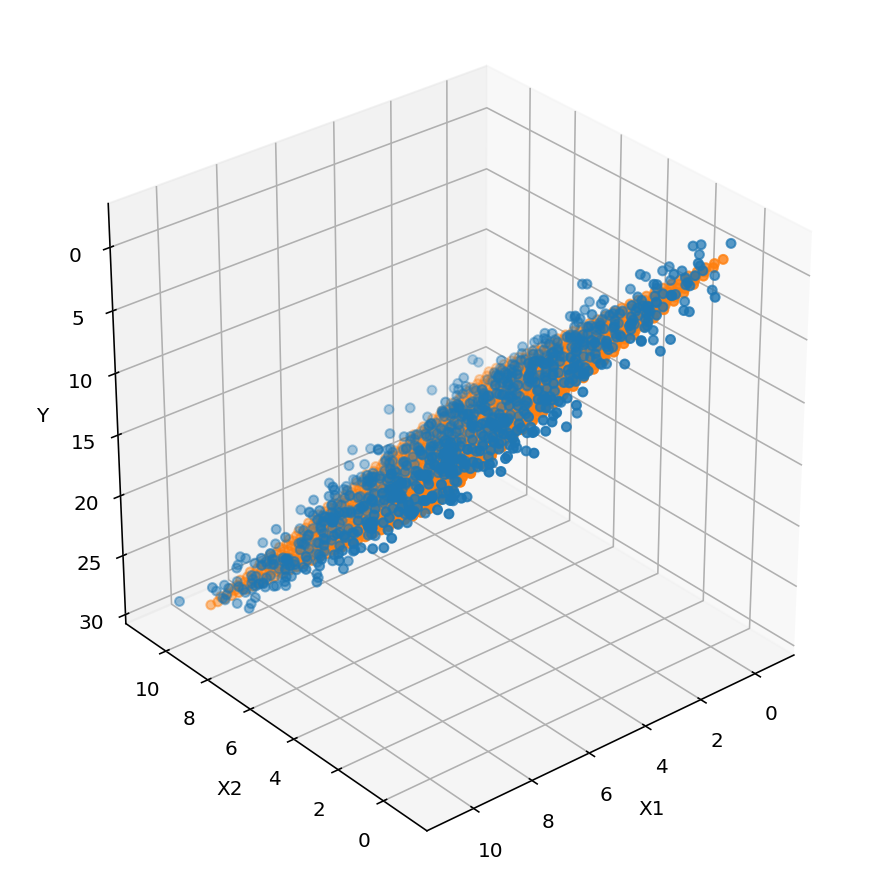

In [131]:
X_plane_range = np.linspace(0,10,num)
X_plane_range = np.linspace(0,10,num)
X1_plane, X2_plane = np.meshgrid(X_plane_range, X_plane_range)
Y_plane = w0 + w1 * X1_plane + w2 * X2_plane

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X1, X2, Y)
ax.scatter(X1_plane, X2_plane, Y_plane)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Gradient Descent

In [132]:
# g'(W)
def g_prime_W(X, Y, W):
    return 2*X.T.dot(X).dot(W) - 2*X.T.dot(Y)

In [133]:
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X
W = np.matrix(np.zeros((3,1)))
Y = Y.reshape(-1, 1)

print(X.shape, Y.shape, W.shape)

#while True:
for i in range(10000):
    grad = g_prime_W(X, Y, W)
    W_new = W - 0.000001 * grad
    if np.linalg.norm(W_new - W, ord = 1) < 0.00001:
        print(i)
        break
    W = W_new
    
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

(900, 3) (900, 1) (3, 1)
Y = -0.64 + 0.98*X1 + 1.94*X2


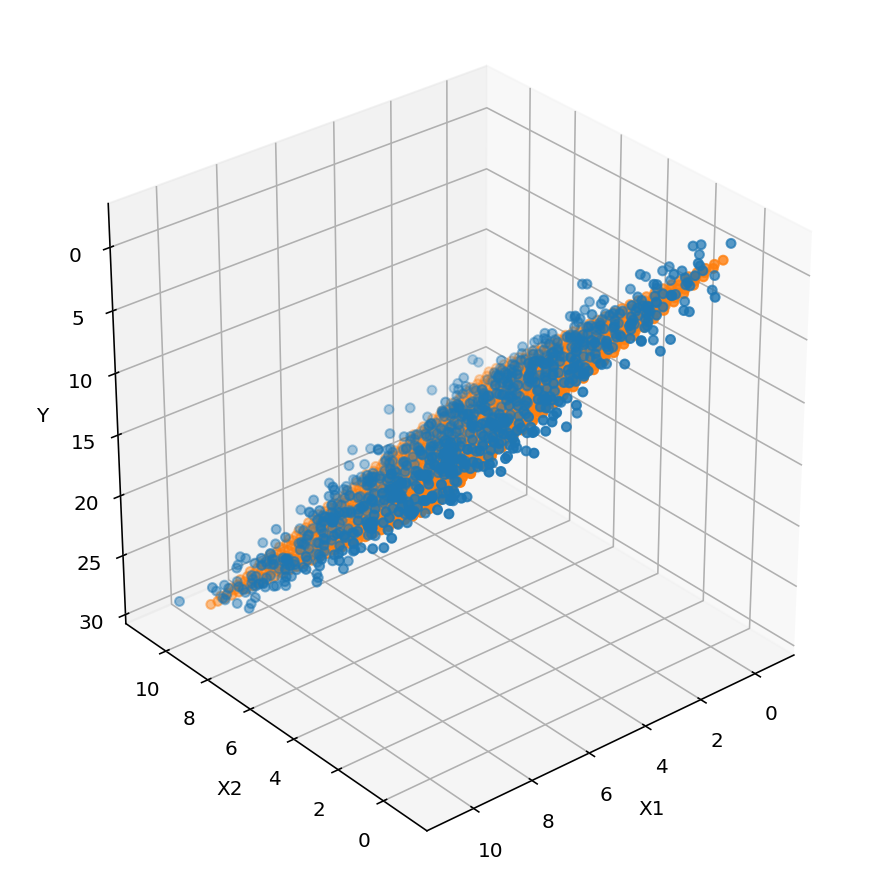

In [134]:
X_plane_range = np.linspace(0,10,num)
X_plane_range = np.linspace(0,10,num)
X1_plane, X2_plane = np.meshgrid(X_plane_range, X_plane_range)
Y_plane = w0 + w1 * X1_plane + w2 * X2_plane

fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X1, X2, Y)
ax.scatter(X1_plane, X2_plane, Y_plane)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Q6 Parabola

### Original Data

In [135]:
X_and_Y = np.load('./parabola.npy')
X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)

### 1.1 Parabola Estimation with L2 Norm 

y = 2.36x^2 - 16.06x+51.07


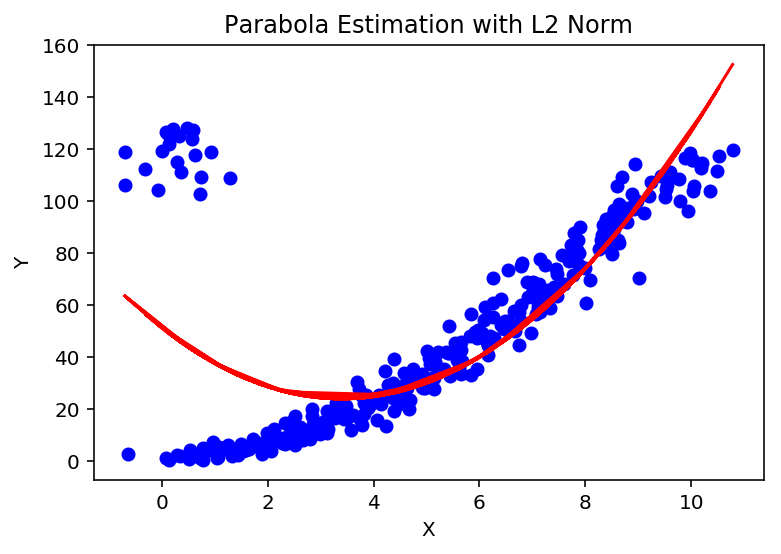

In [136]:
import numpy as np
from numpy.linalg import inv
X_ones = np.ones((300,1))
X1 = np.hstack((X_ones, np.reshape(X,(300,1)),np.reshape((X*X),(300,1))))
Y1 = np.reshape(Y,(300,1))
A = np.dot(np.transpose(X1),X1)
W = np.dot(inv(A),np.dot(np.transpose(X1),Y1))
print("y = 2.36x^2 - 16.06x+51.07")
plt.scatter(X, Y, c = 'b')
plt.plot(X,np.dot(X1,W),c = 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Parabola Estimation with L2 Norm")
plt.show()


### 1.2 Parabola Estimation with L1 Norm (Gradient Descent)

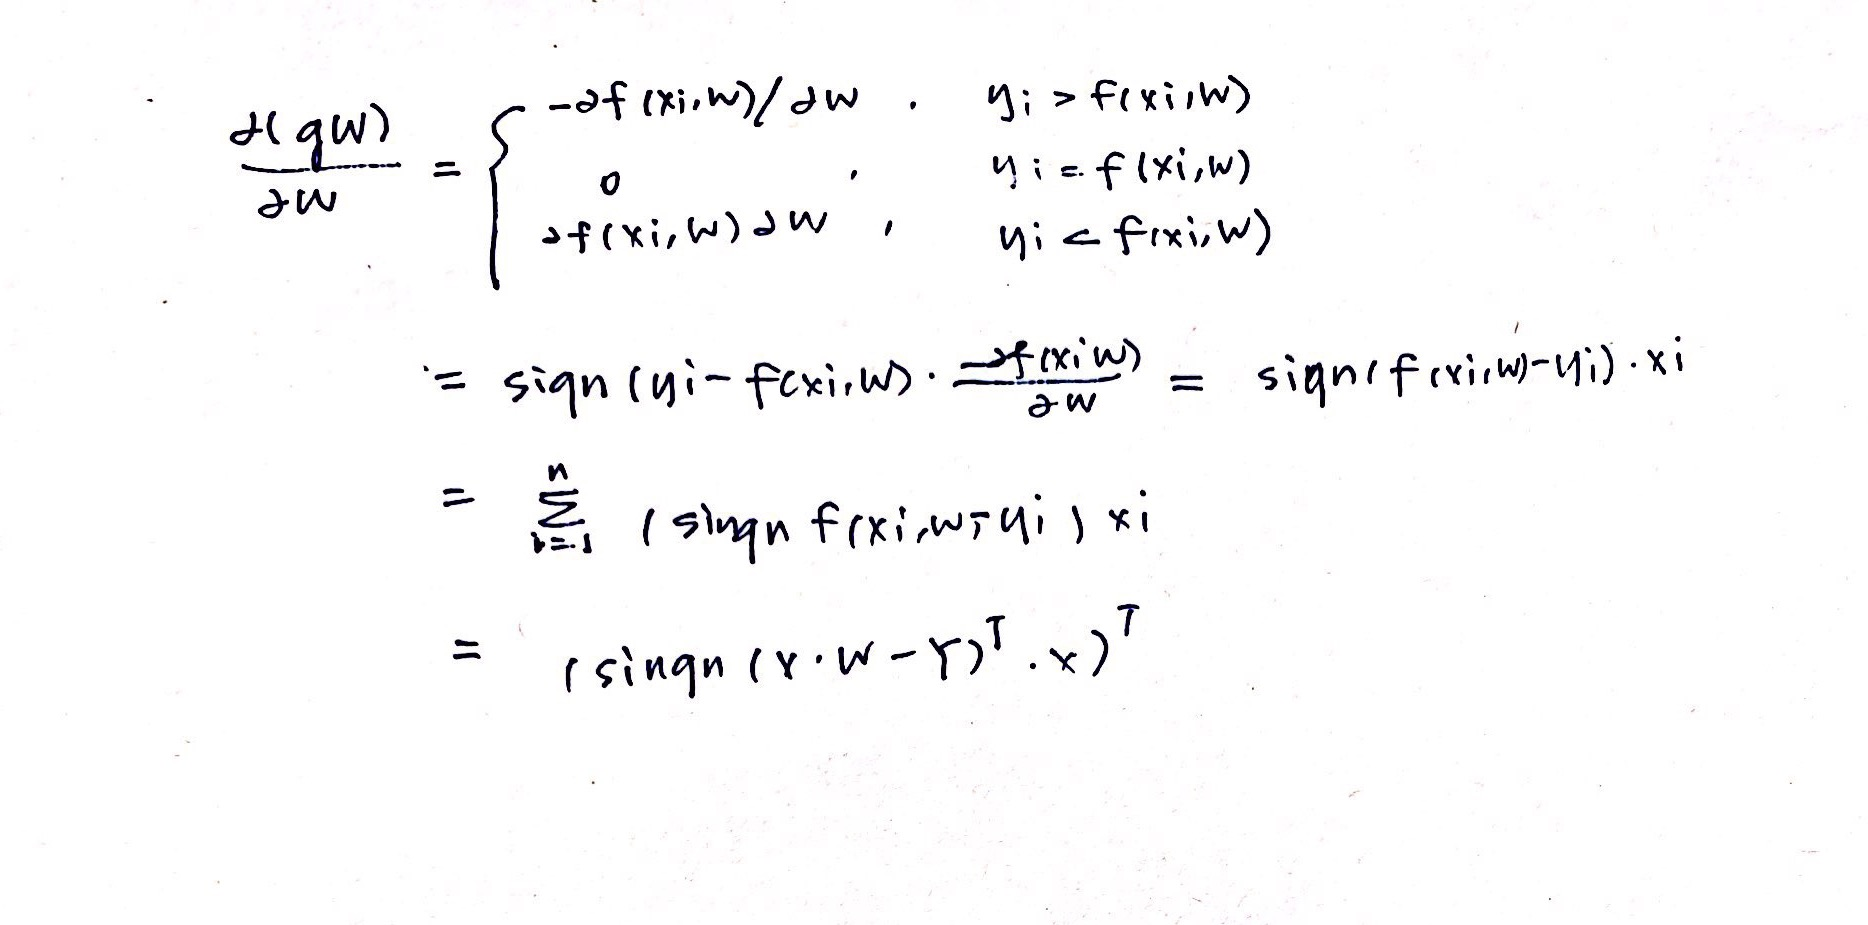

[1.068966   1.42814179 1.02832859]


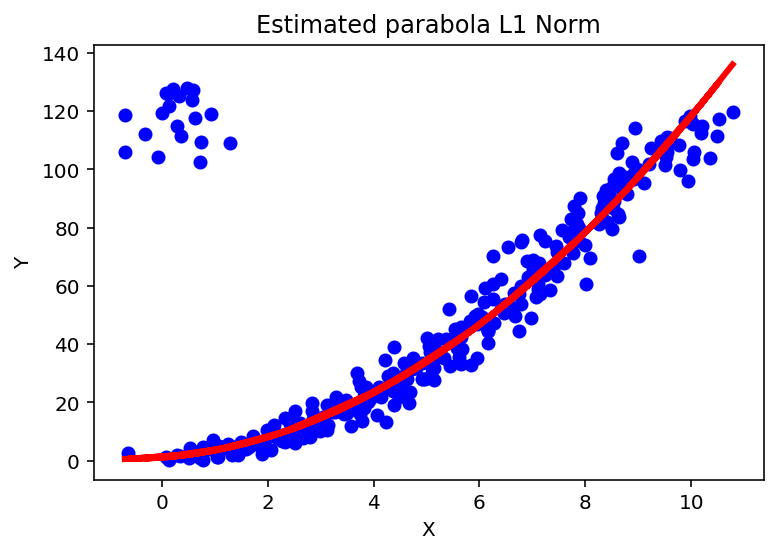

In [137]:
def gradient(X, Y, W):
    sign = np.sign(X.dot(W) - Y.T)
    gradient = np.dot(sign,X)
    return gradient[0]

def  Gdescent(X, Y, W, rate, itera, thresh):
    add = []
    hist = []
    hist.append(W)
    for i in range(itera):
        add.append(sum(abs(X.dot(W) - Y)))
        hist1 = hist[i] - rate* gradient(X,Y,hist[i])
        hist.append(hist1)
        error = abs(hist[i+1]-hist[i])
        if sum(error) < thresh:
            break
    return hist1

W1 = Gdescent(X1,Y1,[0,0,0],0.000001,300000,0.00001)
print(W1)

plt.scatter(X,Y,c = 'b')
plt.plot(X,np.dot(X1, W1),c = 'r',linewidth = 3.0)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Estimated parabola L1 Norm')
plt.show()

### 1.3 Parabola Estimation with L1 and L2 Norm (Gradient Descent)

[0.53818517 0.52205342 1.14096852]
[0.85011015 0.70397013 1.11249085]
[1.15258814 0.8643942  1.08781005]


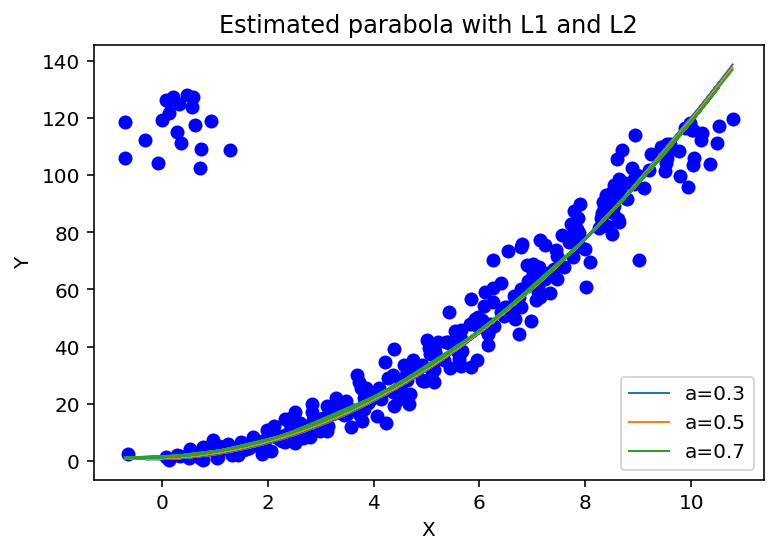

In [138]:
def gradient(X, Y, W, a):
    sign = np.sign(X.dot(W) - Y.T)
    L1 = np.dot(sign, X1)
    L2 = 2*((X.dot(W)- Y.T).dot(X))
    gradient = L1[0]+a*L2[0]
    return gradient

def  Gdescent(X, Y, W, rate, itera, thresh,a):
    add = []
    hist = []
    hist.append(W)
    for i in range(itera):
        add.append(sum(abs(X.dot(W) - Y)))
        hist1 = hist[i] - rate* gradient(X,Y,hist[i],a)
        hist.append(hist1)
        error = abs(hist[i+1]-hist[i])
        if sum(error) < thresh:
            break
    return hist1

plt.scatter(X,Y,c = 'b')

for a in [0.3, 0.5, 0.7]:
    W1 = Gdescent(X1,Y1,[0,0,0],0.000001,300,0.00001,a)
    print(W1)
    plt.plot(X, np.dot(X1,W1), label = 'a='+ str(a), linewidth = 1)
    
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Estimated parabola with L1 and L2')
plt.show()

### 1.4 Comparison (Visualization)

1. L1 curves models the valid data points well but L2 and L1+L2 curve is effected by the outliers.

2. L1 is effected less from outliers compared to L2 so that less penalty loss makes L1 represent valid data points better than L2.

3. L2 and L1+L2 is similar because L2 loss of penalty is way more larger than that of L1 so that the shape of L1+L2 is closer to L2 than L1. 